In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
def step_gradient(X, Y, learning_rate, reg, m):    
    M = len(X)
    
    slopes_m = []
    for i in range(len(m)):
        if(m[i] >= 0):
            lasso_reg = reg
        else:
            lasso_reg = -reg
        
        m_i = (1/M) * ( (lasso_reg) - (((Y - (1/(1 + np.exp(-((m * X).sum(axis = 1)))))) * X[:, i]).sum()) )
        slopes_m.append(m_i)
    slopes_m = np.array(slopes_m)
    
    new_m = m - learning_rate * slopes_m
    
    return new_m

In [3]:
def gradient_descent(X, Y, learning_rate, reg, num_iterations):
    m = np.zeros(len(X[0]))
    total_cost = []
    for i in range(num_iterations):
        m = step_gradient(X, Y, learning_rate, reg, m)
        curr_cost = cost(X, Y, reg, m)
        total_cost.append(curr_cost)
    plt.plot(np.array(total_cost))
    plt.show()
    return m

In [4]:
def cost(X, Y, reg, m):    
    M = len(X)
    
    h_x = (1/(1 + np.exp(-((m * X).sum(axis = 1)))))
    cost = (1/M) * ( ((((-Y) * np.log(h_x)) - (1 - Y) * (np.log(1 - h_x))).sum()) + (reg * (np.abs(m).sum())) )
    
    return cost

In [5]:
def predict(X_test, m):
    preds = 1/(1 + np.exp(-((m * X_test).sum(axis = 1))))
    for i in range(len(preds)):
        if (preds[i] > 0.5):
            preds[i] = 1
        else:
            preds[i] = 0
    return preds

In [6]:
def accuracy(Y_test, preds):
    return (((Y_test == preds).sum())/len(Y_test))*100

In [7]:
def run():
    data = datasets.load_breast_cancer()   
    X = data.data
    Y = data.target
    
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X = np.append(X, np.ones(len(X)).reshape(-1, 1), axis = 1)
    
    m = gradient_descent(X, Y, learning_rate = 4.5, reg = 1, num_iterations = 100) 
    
    preds = predict(X, m)
    score = accuracy(Y, preds)
    print('Accuracy: ', score)

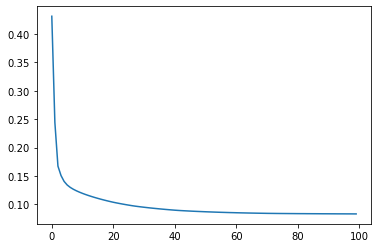

Accuracy:  98.76977152899823


In [8]:
run()